#Airport Wait Time Simulation

In [1]:
%matplotlib inline
#Imports for solution
import numpy as np
import scipy.stats as sp
from matplotlib.pyplot import *
#Setting Distribution variables

##All rates are in per Minute.

For this simulation, we'll be using numpy and scipy for their statistical and matrix math prowess and matplotlib as our primary plotting tool

In [2]:
#Everything will me modeled as a Poisson Process

SIM_TIME = 180

QUEUE_ARRIVAL_RATE = 15

N_SCANNERS =4

SCANNER_BAG_CHECKING_RATE = 3 #Takes 20 seconds to put your bag on Scanner

FRISK_MACHINES_PER_SCANNER = 3 #Number of people checking machine per scanner

N_FRISK_MACHINES = N_SCANNERS*FRISK_MACHINES_PER_SCANNER

FRISK_CHECKING_RATE = 2 #Half a minute per frisk

SCANNER_RATE = SCANNER_BAG_CHECKING_RATE*N_SCANNERS

FRISK_RATE = FRISK_CHECKING_RATE*N_FRISK_MACHINES

FRISK_ARRIVAL_RATE = SCANNER_RATE


Setting the arrival rates for each of the steps in the airport arrival process. First is the arrival to the queue, then to the scanning machines and then scanning to the frisking booth.

>We have discounted travel time in the queue, and assumed that all the frisking and scaanning booths are similar and this the overall rate of scanning and friskign will be sum of all the rates at each step

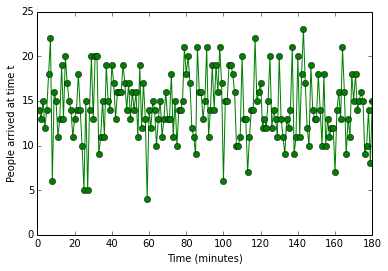

In [9]:
#Queue Modeling
ARRIVAL_PATTERN = sp.poisson.rvs(QUEUE_ARRIVAL_RATE,size = SIM_TIME) #for an hour

ARRIVAL_LIST = []

for index, item in enumerate(ARRIVAL_PATTERN):
    ARRIVAL_LIST += [index]*item

#print ARRIVAL_LIST

TIMEAXIS = np.linspace(1,SIM_TIME,SIM_TIME)


fig = figure()
arrivalplot = plot(TIMEAXIS,ARRIVAL_PATTERN,'go-')
ylabel('People arrived at time t')
xlabel("Time (minutes)")
show()

We're taking the arrivals at each of the time intervals, generated by a poisson function and storing the number of people who have arrived at each minute. 

The **ARRIVAL_LIST** variable is used to calculate the entry time of each of the people in the queue. This will be later used to assess overall wait time for people in the queue.

The time axis is used to help plot results as X-axis variable

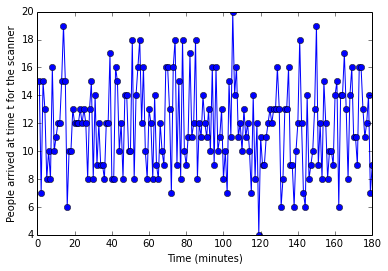

In [11]:
SCAN_PATTERN = sp.poisson.rvs(SCANNER_RATE,size=SIM_TIME)
SCAN_LIST = []
for index, item in enumerate(SCAN_PATTERN):
    SCAN_LIST += [index]*item

arrivalfig = figure()
arrivalplot = plot(TIMEAXIS,SCAN_PATTERN,'o-')
ylabel('People arrived at time t for the scanner')
xlabel("Time (minutes)")
show()

And this is the pattern for the scanner

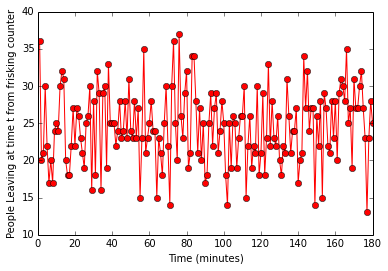

In [12]:
FRISK_PATTERN = sp.poisson.rvs(FRISK_RATE,size=SIM_TIME)
FRISK_LIST = []
for index, item in enumerate(FRISK_PATTERN):
    FRISK_LIST += [index]*item

arrivalfig = figure()
arrivalplot = plot(TIMEAXIS,FRISK_PATTERN,'ro-')
ylabel('People Leaving at time t from frisking counter')
xlabel("Time (minutes)")
show()

>Critical to note that this ignores the queuing and assumes that xx people are processed at each time interval at the counter. This will be used in conjunction with the scanner output to choose the bottle neck at each point in time

In [15]:
EXIT_NUMER = zip(FRISK_PATTERN,SCAN_PATTERN)
EXIT_NUMBER = [min(k) for k in EXIT_NUMER]

#plot(EXIT_NUMBER,'o')
#show()
EXIT_PATTERN = []

for index, item in enumerate(EXIT_NUMBER):
    EXIT_PATTERN += [index]*item


Minimum number of processed people between the scanners and the frisking is the bottleneck at any given time, and this will be the exit rate at any given time.

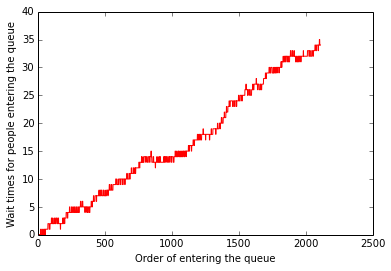

In [23]:
RESIDUAL_ARRIVAL_PATTERN = ARRIVAL_LIST[0:len(EXIT_PATTERN)]    
WAIT_TIMES = [m-n for m,n in zip(EXIT_PATTERN,RESIDUAL_ARRIVAL_PATTERN)]

#print EXIT_PATTERN

'''
for i,val in EXIT_PATTERN:
    WAIT_TIMES += [ARRIVAL_PATTERN(i) - val]
'''

plot(WAIT_TIMES,'r-')
ylabel('Wait times for people entering the queue')
xlabel("Order of entering the queue")
ylim([0,40])
show()

As you can see, by the time we get to 3 hours, the waiting time goes up to 35 minutes. This is for an over simplified simulation run of the model. 

Next post, I will model this as a Markov process and estimate mean waiting time for a passenger and contrast it with theoretical results. 


I am a consultant by trade, and every Monday morning and Friday evening, I wait at airports in queues to get checked, and I thought it'd be fun to go ahead and model this phenomenon in a quick and dirty fashion. Maybe somebody from the airport will see this and realize what parameters are important in this and the non-linearity involved.